In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import random
%matplotlib inline

In [46]:
df = pd.read_csv('train.csv')
df0 = pd.read_csv('test.csv')
combine = [df, df0]

In [47]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<function matplotlib.pyplot.show(close=None, block=None)>

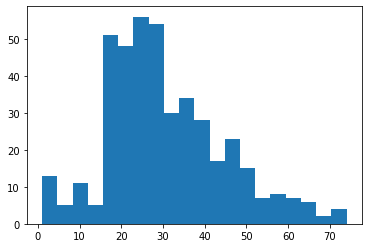

In [48]:
plt.hist(df[df['Survived'] == 0].Age, bins=20)
plt.show

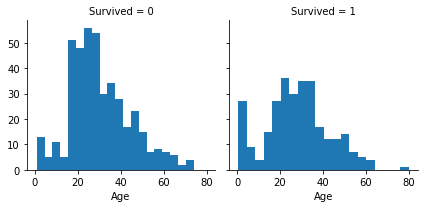

In [49]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

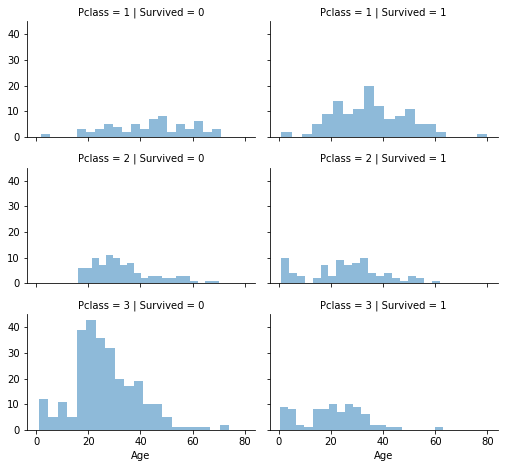

In [50]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

A:\2PROGRAMMS\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
A:\2PROGRAMMS\Anaconda\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


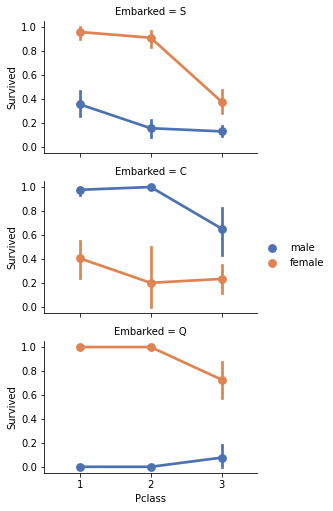

In [51]:
grid = sns.FacetGrid(df, row='Embarked', height=2.4, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [52]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [53]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype('int')

In [54]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [55]:
age_nan = np.zeros((2,3))

for sex in range(0,2):
    for pcl in range(1,4):
        df_SexPcl = df[(df['Sex'] == sex) & (df['Pclass'] == pcl)]['Age'].dropna()
        age_nan[sex,pcl-1] = int(df_SexPcl.median()/0.5 + 0.5) * 0.5
        
for sex in range(0,2):
    for pcl in range(1,4):
        df.loc[((df['Age'].isnull()) & (df['Sex'] == sex) & (df['Pclass'] == pcl)), 'Age'] = \
            age_nan[sex, pcl-1]

df['Age'] = df['Age'].astype(int)

age_nan

array([[40. , 30. , 25. ],
       [35. , 28. , 21.5]])

In [56]:
df['AgeBand'] = pd.cut(df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean() \
    .sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [57]:
df.loc[ df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4

In [58]:
df = df.drop('AgeBand', axis=1)

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,1,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,1,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,1,0,0,111369,30.0000,C148,C


In [60]:
df['FamSize'] = df['Parch'] + df['SibSp'] + 1

In [61]:
df[['FamSize', 'Survived']].groupby(['FamSize'], as_index=False) \
    .mean().sort_values(by='Survived', ascending=False)

,FamSize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [62]:
df['IsAlone'] = 0
df.loc[df['FamSize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [63]:
df = df.drop(['Parch', 'SibSp', 'FamSize'], axis=1)

In [64]:
freq_port = df.Embarked.dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(freq_port)

In [65]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [66]:
df = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)
#df['Families'] = df['SibSp'] + df['Parch']

<AxesSubplot:xlabel='Pclass'>

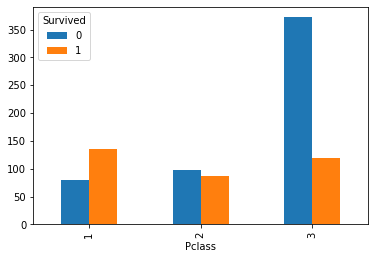

In [67]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')


<AxesSubplot:xlabel='Sex'>

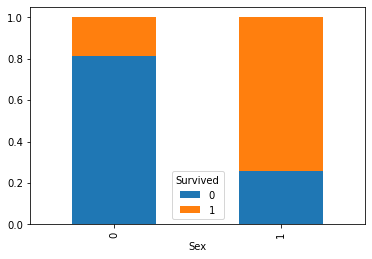

In [68]:
table = pd.crosstab(df.Sex,df.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)

In [70]:
#pd.crosstab(df.Families,df.Survived).plot(kind='bar')


<AxesSubplot:xlabel='Embarked'>

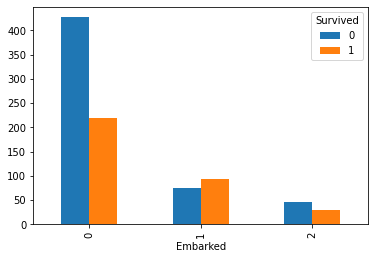

In [71]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')


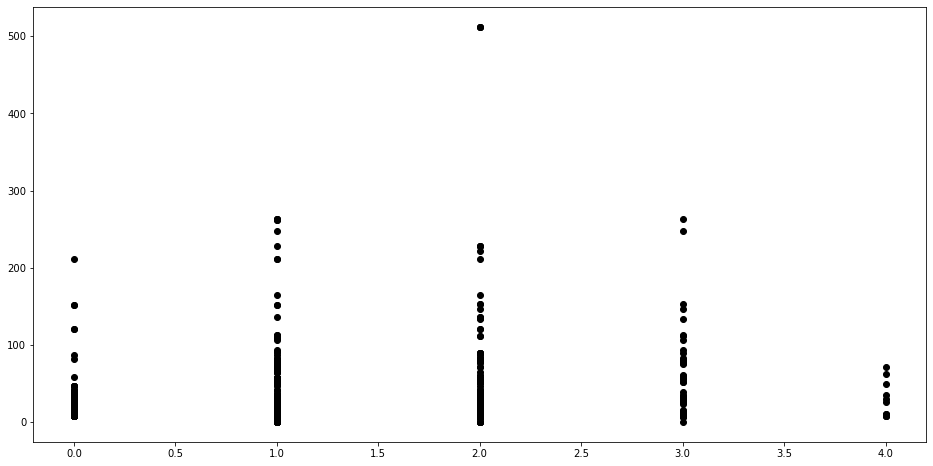

In [72]:
plt.figure(figsize=(16, 8))
plt.scatter(
    df['Age'],
    df['Fare'],
    c='black'
)
plt.show()

<AxesSubplot:>

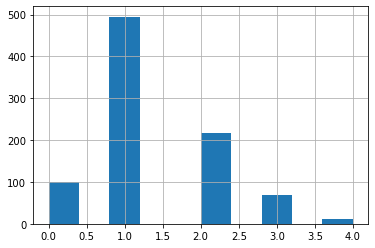

In [73]:
df.Age.hist()

### Машинное обучение

In [76]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,1,0,3,0,1,7.2500,0,0
1,2,1,1,1,2,71.2833,1,0
2,3,1,3,1,1,7.9250,0,1
3,4,1,1,1,2,53.1000,0,0
4,5,0,3,0,2,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,13.0000,0,1
887,888,1,1,1,1,30.0000,0,1
888,889,0,3,1,1,23.4500,0,0
889,890,1,1,0,1,30.0000,1,1


In [77]:
X = df.drop(['Survived', 'PassengerId'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
y = df.Survived

In [78]:
X

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,1,7.2500,0,0
1,1,1,2,71.2833,1,0
2,3,1,1,7.9250,0,1
3,1,1,2,53.1000,0,0
4,3,0,2,8.0500,0,1
...,...,...,...,...,...,...
886,2,0,1,13.0000,0,1
887,1,1,1,30.0000,0,1
888,3,1,1,23.4500,0,0
889,1,0,1,30.0000,1,1


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### DecisionTree

In [80]:
clf_dt = tree.DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'],
             'max_depth': range(1,20)}
clf_dt_grid = GridSearchCV(clf_dt, parameters, cv=5)
clf_dt_grid.fit(X_train, y_train)

clf_dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [81]:
grid_search_cv_clf.score(X_test, y_test)

NameError: name 'grid_search_cv_clf' is not defined

### SVM

In [ ]:
from sklearn import svm

In [ ]:
clf_svm = svm.SVC()

clf_svm.fit(X_train, y_train)

In [ ]:
clf_svm.score(X_test, y_test)

### Logistic Regression

##### Пробуем выровнять количество survived

In [ ]:
df1 = df[df['Survived'] == 1]
df0 = df[df['Survived'] == 0]
df0.sample(frac=1)
df0 = df0[:len(df1)]
df01 = pd.concat([df0, df1])

##### Учим

In [ ]:
X = df.drop(['Survived', 'PassengerId', 'SibSp', 'Parch'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
y = df.Survived

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_log = LogisticRegression(max_iter=700)

clf_log.fit(X, y)


In [ ]:
from sklearn import metrics
y_pred = clf_log.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

In [ ]:
clf_log.score(X, y)

### Предугадываем на тестовых данных

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test_ver2 = df_test.drop(['Cabin', 'Ticket', 'Name'], axis=1)
df_test_ver2['Families'] = df_test_ver2['SibSp'] + df_test['Parch']

In [ ]:
df_test_ver2 = df_test_ver2.drop(['PassengerId', 'SibSp', 'Parch'], axis=1)

In [ ]:
X_test_test = df_test_ver2
X_test_test = X_test_test.fillna({'Age': X_test_test.Age.median()})
X_test_test = X_test_test.fillna({'Fare': X_test_test.Fare.median()})
X_test_test = pd.get_dummies(X_test_test)

In [ ]:
y_test_pred = clf_log.predict(X_test_test)

In [ ]:
df_pred = pd.DataFrame(y_test_pred).rename(columns={0: 'Survived'})

df_test = df_test.PassengerId.to_frame().join(df_pred)

df_test.to_csv('answer.csv', index=False)